22H1120016 Trần Đăng Nam

Lab 5.2

Cài đặt package FIM từ nguồn http://www.borgelt.net

Chạy thử giải thuật Apriori trên dữ liệu của bài trước

Lưu ý: Tham khảo source code pyfim/ex để biết cách sử dụng

Lên mạng tải về  https://borgelt.net/pyfim.html --> pyfim.zip va unzip 

pip install mlxtend

Apriori Results - Frequent Itemsets:
    support               itemsets
0       0.6                 (Beer)
1       0.8                (Bread)
2       0.4                 (Coke)
3       0.8               (Diaper)
4       0.8                 (Milk)
5       0.4          (Bread, Beer)
6       0.6         (Diaper, Beer)
7       0.4           (Beer, Milk)
8       0.6        (Bread, Diaper)
9       0.6          (Bread, Milk)
10      0.4         (Diaper, Coke)
11      0.4           (Coke, Milk)
12      0.6         (Diaper, Milk)
13      0.4  (Bread, Diaper, Beer)
14      0.4   (Diaper, Beer, Milk)
15      0.4  (Bread, Diaper, Milk)
16      0.4   (Diaper, Coke, Milk)

Apriori Results - Association Rules:
      antecedents     consequents  support  confidence
0          (Beer)        (Diaper)      0.6         1.0
1          (Coke)        (Diaper)      0.4         1.0
2          (Coke)          (Milk)      0.4         1.0
3   (Bread, Beer)        (Diaper)      0.4         1.0
4    (Beer, Milk)   

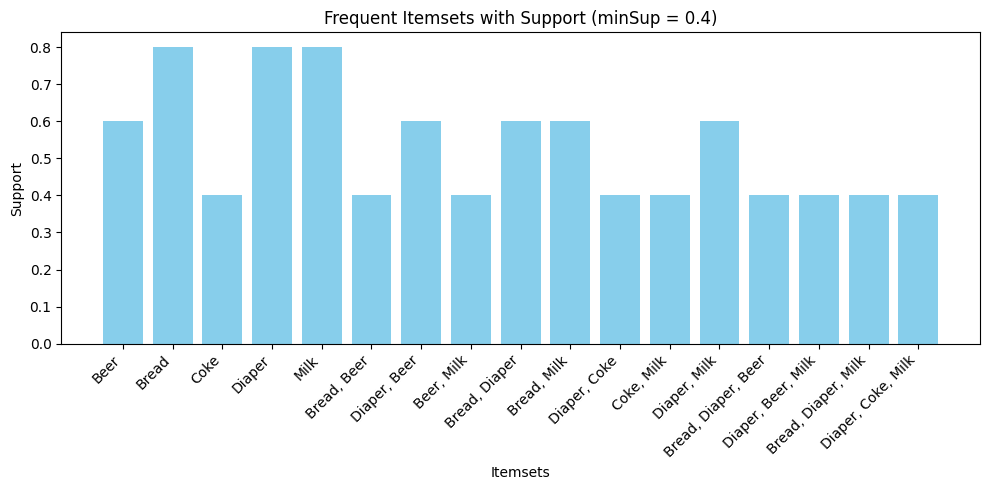

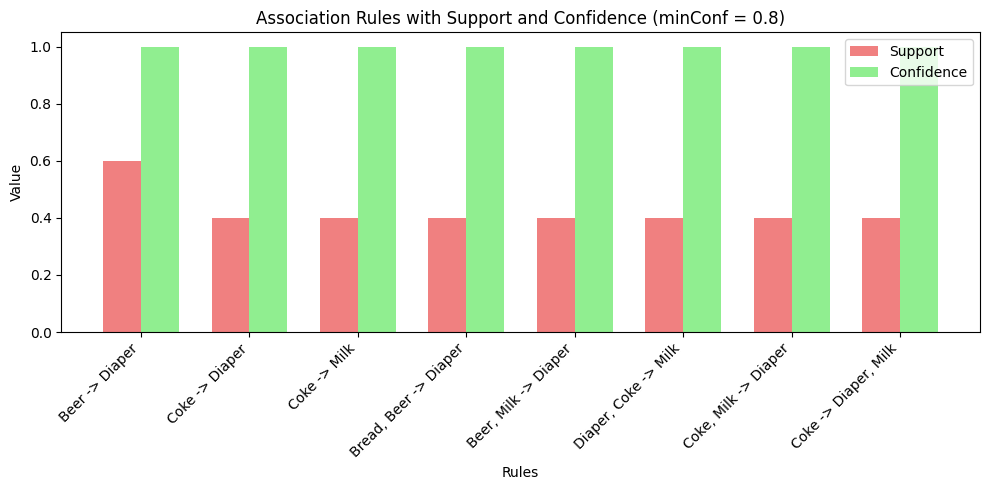

In [2]:
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

transactions = [
    ['Bread', 'Milk'],
    ['Bread', 'Diaper', 'Beer', 'Eggs'],
    ['Milk', 'Diaper', 'Beer', 'Coke'],
    ['Bread', 'Milk', 'Diaper', 'Beer'],
    ['Bread', 'Milk', 'Diaper', 'Coke']
]

# Bước 1: chuyển data thành one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Bước 2: chạy Apriori 
minSup = 0.4  # Minimum support (40%)
minConf = 0.8  # Minimum confidence (80%)
print("Apriori Results - Frequent Itemsets:")
frequent_itemsets_apriori = apriori(df, min_support=minSup, use_colnames=True)
print(frequent_itemsets_apriori)

print("\nApriori Results - Association Rules:")
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=minConf)
print(rules_apriori[['antecedents', 'consequents', 'support', 'confidence']])

# Step 3: Visualize Frequent Itemsets và Association Rules (Apriori) 
plt.figure(figsize=(10, 5))
itemset_labels = frequent_itemsets_apriori['itemsets'].apply(lambda x: ', '.join(list(x)))
supports = frequent_itemsets_apriori['support']
plt.bar(itemset_labels, supports, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Frequent Itemsets with Support (minSup = 0.4)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
rule_labels = rules_apriori.apply(lambda x: f"{', '.join(list(x['antecedents']))} -> {', '.join(list(x['consequents']))}", axis=1)
supports = rules_apriori['support']
confidences = rules_apriori['confidence']
x = range(len(rule_labels))
width = 0.35
plt.bar(x, supports, width, label='Support', color='lightcoral')
plt.bar([i + width for i in x], confidences, width, label='Confidence', color='lightgreen')
plt.xticks([i + width/2 for i in x], rule_labels, rotation=45, ha='right')
plt.xlabel('Rules')
plt.ylabel('Value')
plt.title('Association Rules with Support and Confidence (minConf = 0.8)')
plt.legend()
plt.tight_layout()
plt.show()